# Decision Tree 

## 1. What's decision tree? ex) 스무고개
: 분류 또는 회귀 문제를 풀기위한 모델

![title](image/decision_tree.png)

## 2. How to construct the decision tree?
: 어떤 순서로 트리를 구성할 것인가?

- **정보이득(Information Gain) : 분기 전/후 엔트로피 차이 비교**
        : 부모 엔트로피 - 자식 엔트로피의 평균
        : 정보이득이 클수록 변별력이 크다
- **엔트로피(Entropy) : Impurity(불순도)를 측정하는 방법**

![title](image/impurity.png)
![title](image/entropy.png)

## Example
![title](image/gain.png)
![title](image/gain1.png)
![title](image/gain2.png)

## 3. How to implement decision tree?

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import SVG, display
from graphviz import Source
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
% matplotlib inline

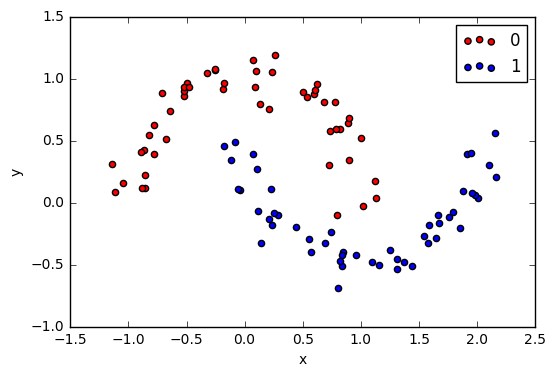

In [41]:
# dataset
x, y = make_moons(n_samples=100, noise=0.1)
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [42]:
# model learning
estimator = DecisionTreeClassifier(criterion='entropy',random_state=0)
estimator.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

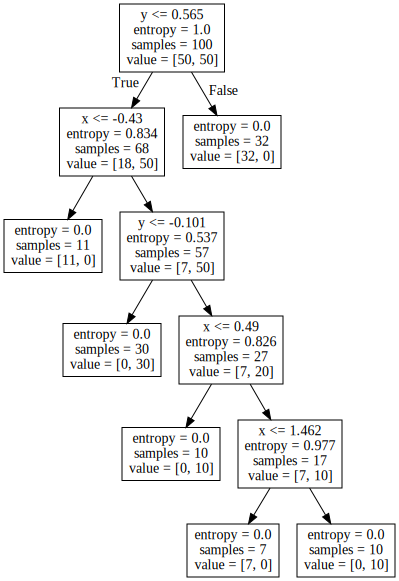

In [43]:
# graph visualization
graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=['x','y']))
display(SVG(graph.pipe(format='svg')))

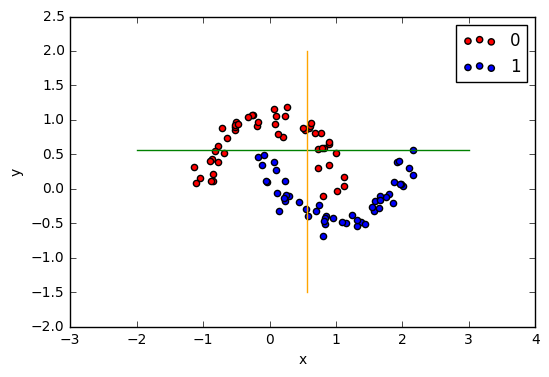

In [44]:
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

# 첫번째 분기 기준    
if estimator.tree_.feature[0] == 1:
    line_x = np.linspace(-2.0, 3.0, 100)
    plt.plot(line_x, line_x * 0 + estimator.tree_.threshold[0], color='green')
elif estimator.tree_.feature[0] == 0:
    line_y = np.linspace(-1.5, 2.0, 100)
    plt.plot(line_y * 0 + estimator.tree_.threshold[0], line_y, color = 'green')

# 두번째 분기 기준
if estimator.tree_.feature[1] == 0:
    line_y = np.linspace(-1.5, 2.0, 100)
    plt.plot(line_y * 0 + estimator.tree_.threshold[0], line_y, color = 'orange')
elif estimator.tree_.feature[1] == 1:
    line_x = np.linspace(-2.0, 3.0, 100)
    plt.plot(line_x, line_x * 0 + estimator.tree_.threshold[0], color='orange')

plt.plot()
plt.show()

## 4. Pros and cons - decision tree

- 장점 : 결과물을 이해하기 쉽다 / 스케일에 대한 영향이 적다(전처리 X)
- 단점 : 과적합이 잘 된다 --> 가지치기 & 앙상블 방법

## 5. Practice - decision tree

In [45]:
# dataset
car = pd.read_csv('data/Usedcarssales.csv')

In [46]:
# seperate features and target
y = car["Price"]
x = car.drop(["Price"], axis = 1)

In [47]:
# split train and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [48]:
# learn model
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
# importance of features
reg.feature_importances_

array([ 0.0249692 ,  0.54880086,  0.21415953,  0.02041232,  0.0157816 ,
        0.01972173,  0.03011852,  0.00359935,  0.03254916,  0.02261224,
        0.02841057,  0.00491511,  0.03394982])

In [49]:
# prediction
predicted = reg.predict(x_test)

In [50]:
# calculate error
rmse = np.sqrt(mean_squared_error(y_test,predicted))
print("Root Mean Square Error is:", rmse)

Root Mean Square Error is: 0.599053676915


## 6. What's ansemble learning?
여러 개의 다른 예측 모델을 결합하여 더 나은 예측 모델을 만드는 기법

배깅(bagging) VS 부스팅(Boosting)
- 배깅 : 서로 독립된 여러 모델 사용   
- 부스팅 : 이전 모델의 오류를 고려

## 7. RandomForest
무작위 데이터 추출(중복/누락) + 일부 피쳐만을 사용(max_features) 하여 여러 개의 트리 생성(n_estimators)

![title](image/randomforest.jpg)

In [128]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)

y = dataframe['class']
x = dataframe.drop(["class"], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [129]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
RFC_score = accuracy_score(y_test, RFC.predict(x_test))
print ('RandomForestClassifier Accuracy :',RFC_score)

RandomForestClassifier Accuracy : 0.733766233766


## 8. AdaBoost (Adaptive Boosting)
weak learner(얕은 트리)의 오차를 보완하여 순차적으로 트리 생성 --> strong learner

![title](image/adaboost.png)

In [130]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
ABC_score = accuracy_score(y_test, ABC.predict(x_test))
print ('AdaBoostClassifier Accuracy :',ABC_score)

AdaBoostClassifier Accuracy : 0.746753246753


그 외 부스팅 알고리즘
- GBM : 오차 함수에 gradient 사용
- Xgboost : GBM + 분산/병렬 처리
- Light GBM : Xgboost 대비 속도향상 및 대량 데이터 학습에 적합